In [87]:
import numpy as np 
import pandas as pd 
import datetime
import os

#define a conversion function for the native timestamps in the csv file
def dateparse (time_in_secs):    
    a = datetime.datetime.fromtimestamp(float(time_in_secs))
    #only date is taken so as to make it easy to work on
    return a.date()

data = pd.read_csv('/home/skymap/Downloads/BTC_data.csv', parse_dates=True, index_col=[0])
data.head()

,Open,High,Low,Close
Date,,,,
2017-01-01,966.6,1006.5,961.3,999.0
2017-01-02,999.2,1034.8,997.3,1019.3
2017-01-03,1019.3,1038.7,1013.5,1037.5
2017-01-04,1037.5,1150.0,1036.4,1139.6
2017-01-05,1139.8,1166.0,865.4,1003.2


In [88]:
date_list =[data.iloc[i].name.date() for i in range(len(data))]

#Writing into a dataframe
df = data.copy()

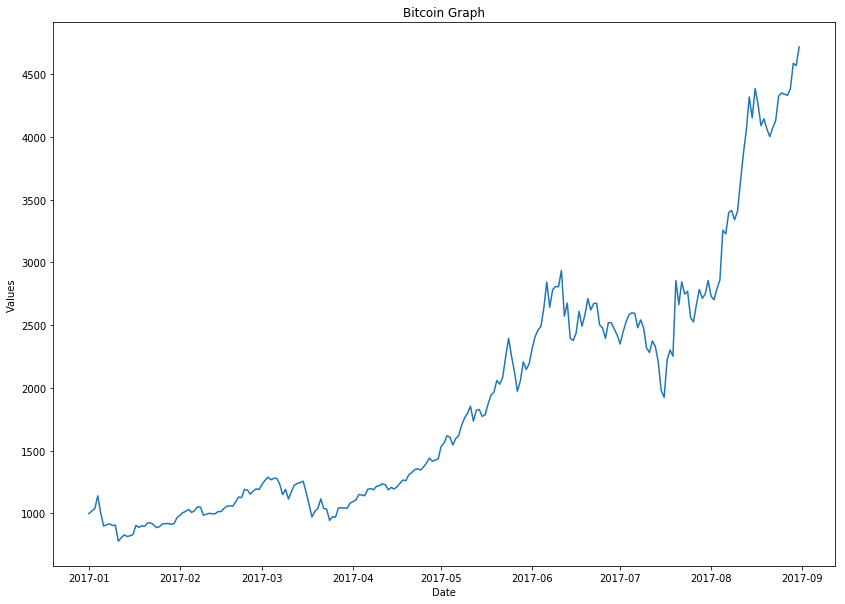

In [89]:
#list of all the closing values
clos_e = [df.iloc[i][3] for i in range(len(df))]
plt.plot(date_list,clos_e)
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Bitcoin Graph")
plt.show()

# Moving Average

In [90]:
#Moving average algorithm
summ, moving_aves = [0], []
#N is the number of values of whose average one wants to take
N= 10
for i, x in enumerate(clos_e, 1):
    summ.append(summ[i-1] + x)
    if i>=N:
        moving_ave = (summ[i] - summ[i-N])/N
        moving_aves.append(moving_ave)

In [91]:
#Making dates array of same length as 
dates = date_list[:]
dates_1 = date_list[:]
for i in range(len(date_list)-len(moving_aves)):
    dates_1.pop(-1)

Populating the interactive namespace from numpy and matplotlib


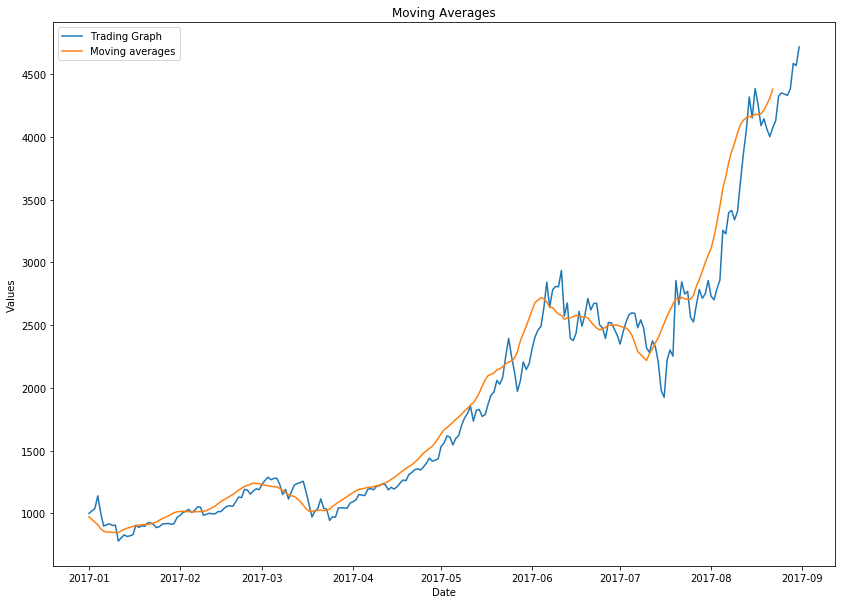

In [92]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 10)
plt.plot(dates,clos_e,label='Trading Graph')
plt.plot(dates_1,moving_aves,label='Moving averages')
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Moving Averages")
plt.legend()
plt.savefig("Moving.png")
plt.show()

### Explanation

>The Graph above is the result of implimentation of Moving average startegy for predicting the probable trend in the market, The Orange line gives you the head's up as to in which direction the market will move.
>
>**As we can see the part where the Orange line start's showing uptrend the market keeps going up, and starts moving down just before the market has a tendency to fall down or is going to change course.**

We can also Implement _**fibonacci Retracement**_ to achieve a realtime trading ability i.e. to trade between the _**High's**_ and _**Low's**_.

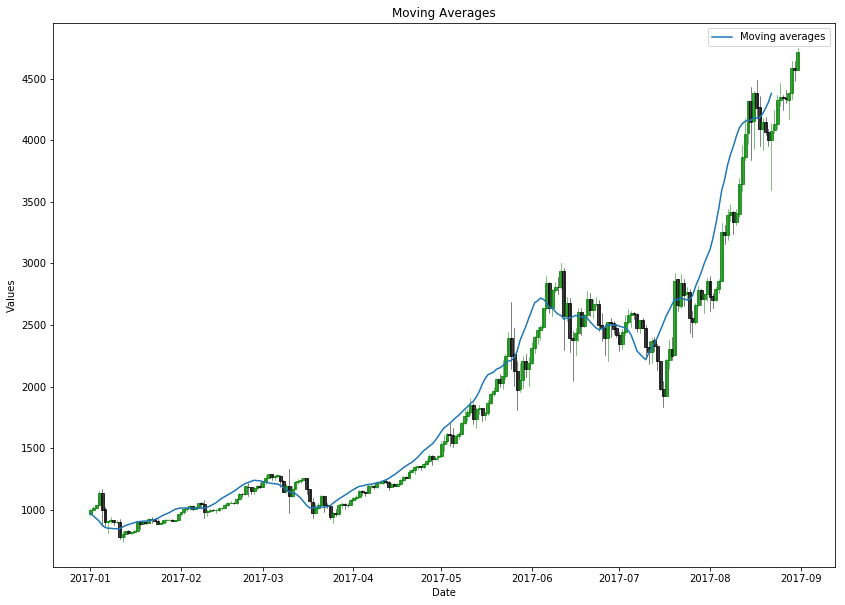

In [95]:
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

df_ohlc = df.reset_index()
df_ohlc.columns = ["Date","Open","High",'Low',"Close"]
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
# fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=6, colspan=1)
candlestick_ohlc(ax1,df_ohlc.values,width=1, colorup='g', colordown='k',alpha=0.75)

#Converts raw mdate numbers to dates
ax1.xaxis_date()
plt.xlabel("Date")
# %pylab inline
# pylab.rcParams['figure.figsize'] = (14, 10)
# plt.plot(dates1,clos_e,label='Trading Graph')
plt.plot(dates_1,moving_aves,label='Moving averages')
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Moving Averages")
plt.legend()
plt.savefig('ww.png')
# plt.savefig("Moving.png")
plt.show()


# Relative Strength Index

In [99]:
up_mov = [0.0]
down_mov = [0.0]
for i in range(len(df['Close'][1:])):
    if df['Close'][i+1] > df['Close'][i]:
        up_mov.append(df['Close'][i+1] - df['Close'][i])
        down_mov.append(0.0)
    elif df['Close'][i+1] < df['Close'][i]:
        down_mov.append(df['Close'][i] - df['Close'][i+1])
        up_mov.append(0.0)
    else:
        up_mov.append(0.0)
        down_mov.append(0.0)

N = 15
avg_up = np.mean(up_mov[:N])
avg_down = np.mean(down_mov[:N])

avg_upmov = [avg_up]
avg_downmov = [avg_down]
for i in range(len(up_mov[14:])):
    avg_upmov.append((avg_up*(N-1)+up_mov[i])/N)
for i in range(len(up_mov[14:])):
    avg_downmov.append((avg_down*(N-1)+down_mov[i])/N)

RS = [avg_upmov[x]/avg_downmov[x] for x in range(len(avg_upmov))]

RSI =[100-(100/(RS[x]+1)) for x in range(len(RS))]

avg_da = dates[:]
for i in range(len(dates)-len(RSI)):
    avg_da.pop(0)

Populating the interactive namespace from numpy and matplotlib


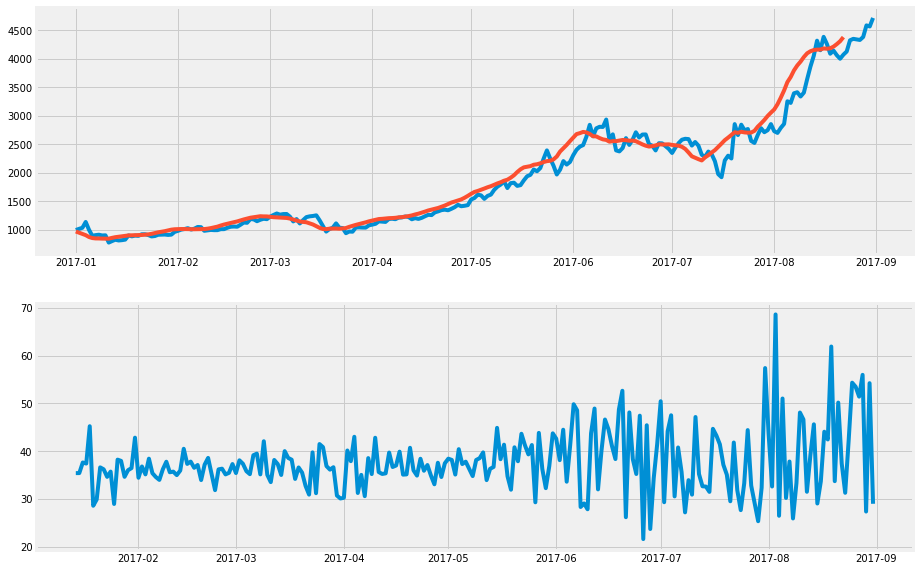

In [100]:
from matplotlib import style
style.use("fivethirtyeight")
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 10)
fig = plt.figure()
ax2 = fig.add_subplot(2,1,1)
ax2.plot(dates,clos_e,label='Trading Graph')
ax2.plot(dates_1,moving_aves,label='Moving averages')
ax3 = fig.add_subplot(2,1,2)
ax3.plot(avg_da,RSI)

RSI gives best understaing when represented on a per day basis data, as it represents up's and downs better that way.

But On a mothly data we can still see a trend.
There are two main points to consider _**Over Bought**_ and _**Over Sold**_.
The peaks represent _**Over Bought**_ and the Trough's represent _**Over Sold**_
When the graph is between 30 and 40 then it means that there is little to no change in it's value. But when the graph starts to stay above 40 i.e 2017-05 to 2017-06 with fewer downs, then the market is technically rising. and consequently if the graph stays below 30 mark then the market is moving downwards.

# Conclusion
Keeping these things in mind and moving average as the guide to probable trend we can see that.
>_**2017-04 to 2017-06 was the time when the market was gradually rising**_.

>_**2017-06 to mid 2017-07 was turbulent as the Moving average was showing a downfall in trend and RSI graph was also neither above 40 mark nor below 30 mark to give us the exact trend.**_